In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
train_labels.shape

(50000, 1)

In [ ]:
test_labels.shape

(10000, 1)

In [ ]:

from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)


In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train_images=train_images/255

In [ ]:
test_images=test_images/255

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(train_images)

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
model=models.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.20))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.20))

model.add(layers.Dense(10, activation='softmax'))

initial_lr = 0.001

def lr_schedule(epoch):
    lr = initial_lr
    if epoch > 30:
        lr *= 0.1
    if epoch > 60:
        lr *= 0.1
    if epoch > 90:
        lr *= 0.1
    return lr
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:

history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, epochs=100,
                    validation_data=(test_images, test_labels),
                    callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/100
1562/1562 [==============================] - 173s 90ms/step - loss: 1.5884 - accuracy: 0.4367 - val_loss: 1.5929 - val_accuracy: 0.4231 - lr: 0.0010
Epoch 2/100
1562/1562 [==============================] - 132s 84ms/step - loss: 1.2370 - accuracy: 0.5602 - val_loss: 1.3333 - val_accuracy: 0.5618 - lr: 0.0010
Epoch 3/100
1562/1562 [==============================] - 140s 90ms/step - loss: 1.1127 - accuracy: 0.6090 - val_loss: 1.0540 - val_accuracy: 0.6276 - lr: 0.0010
Epoch 4/100
1562/1562 [==============================] - 137s 88ms/step - loss: 1.0216 - accuracy: 0.6411 - val_loss: 1.0513 - val_accuracy: 0.6420 - lr: 0.0010
Epoch 5/100
1562/1562 [==============================] - 134s 86ms/step - loss: 0.9657 - accuracy: 0.6637 - val_loss: 1.0598 - val_accuracy: 0.6338 - lr: 0.0010
Epoch 6/100
1562/1562 [==============================] - 131s 84ms/step - loss: 0.9100 - accuracy: 0.6845 - val_loss: 0.7782 - val_accuracy: 0.7293 - lr: 0.0010
Epoch 7/100
1562/1562 [===========

In [ ]:
model=model.save('model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import f1_score, recall_score

In [ ]:
test_accuracy, test_loss = model.evaluate(test_images,test_labels)


test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

test_accuracy = model.evaluate(test_images, test_labels)[1]
test_f1 = f1_score(test_true_classes, test_predictions_classes, average='weighted')
test_recall = recall_score(test_true_classes, test_predictions_classes, average='weighted')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')
print(f'Test Recall: {test_recall:.4f}')

313/313 [==============================] - 5s 17ms/step - loss: 0.4975 - accuracy: 0.8297
Test Accuracy: 0.8297
Test F1 Score: 0.8269
Test Recall: 0.8297


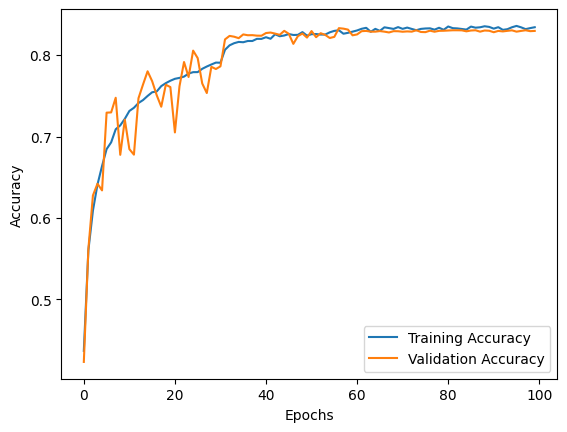

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

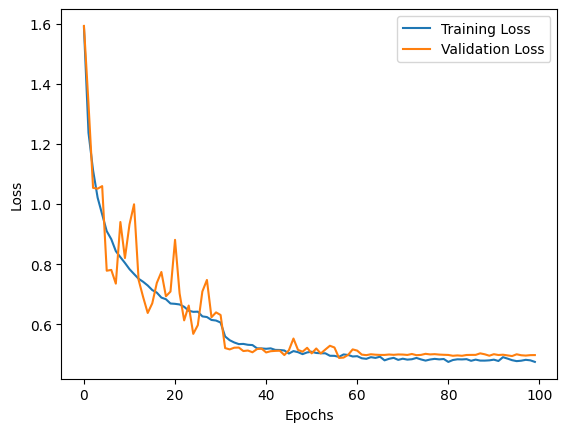

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
num_testing_images=10
random_index=np.random.randint(0,len(test_images),num_testing_images)

In [ ]:
class_names = ["airplane", "automobile", "bird","cat", "deer", "dog","frog", "horse","ship", "truck"]

1/1 [==============================] - 0s 25ms/step


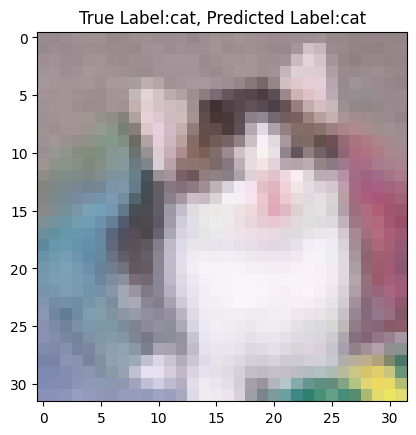

1/1 [==============================] - 0s 24ms/step


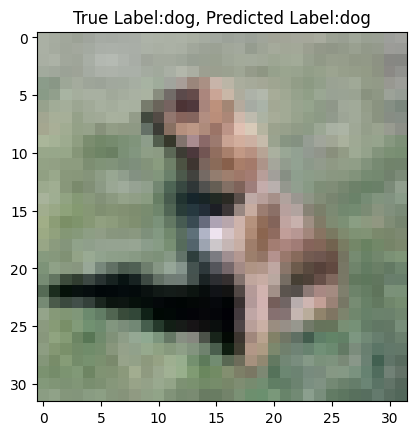

1/1 [==============================] - 0s 29ms/step


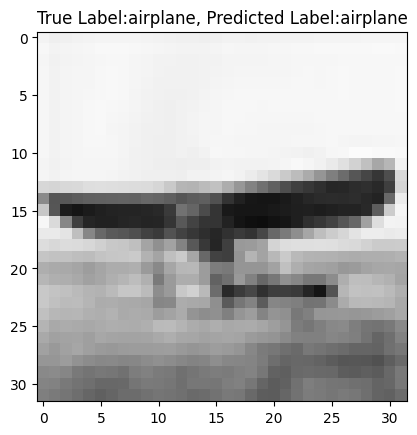

1/1 [==============================] - 0s 23ms/step


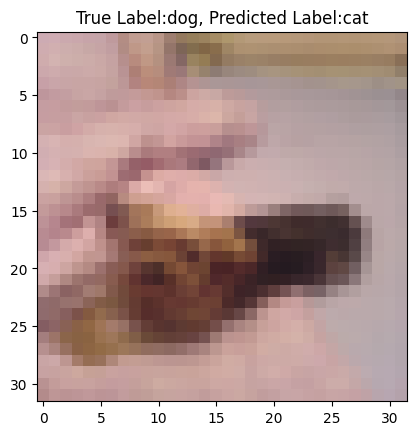

1/1 [==============================] - 0s 23ms/step


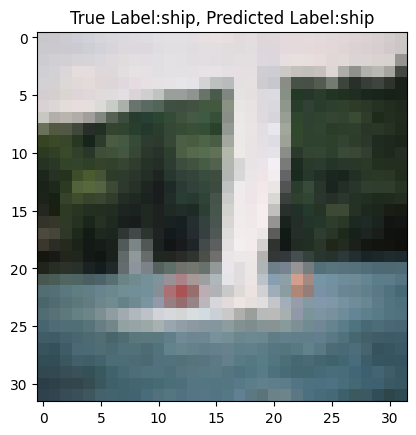

1/1 [==============================] - 0s 23ms/step


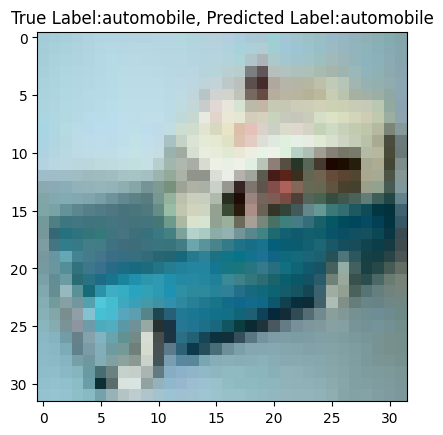

1/1 [==============================] - 0s 29ms/step


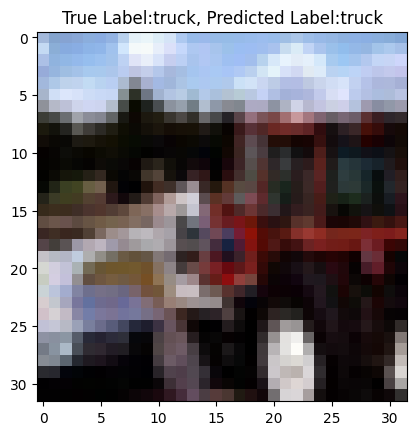

1/1 [==============================] - 0s 22ms/step


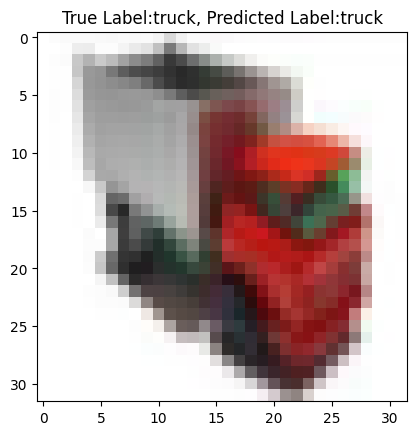

1/1 [==============================] - 0s 25ms/step


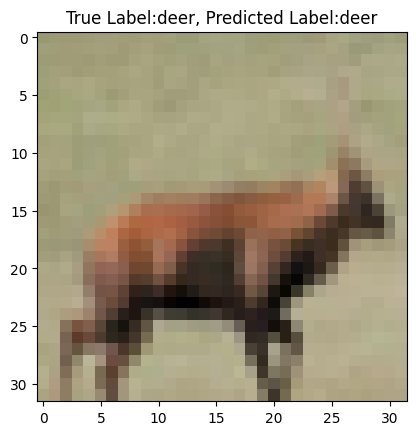

1/1 [==============================] - 0s 34ms/step


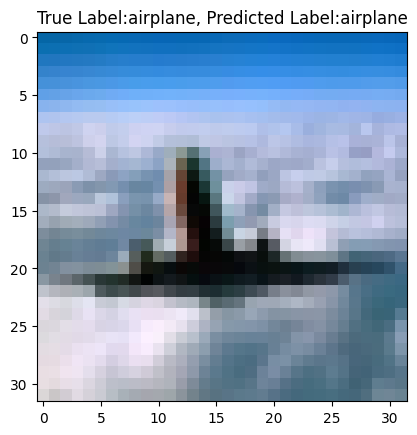

In [ ]:
for i in random_index:

  testing_image=test_images[i]
  true_label=np.argmax(test_labels[i])
  true_label=class_names[true_label]


  testing_image=testing_image.reshape((1,32,32,3))
  predict_labels=np.argmax(model.predict(testing_image))
  predict_labels=class_names[predict_labels]


  plt.figure()
  plt.imshow(testing_image.reshape(32,32,3),cmap='viridis')
  plt.title(f'True Label:{true_label}, Predicted Label:{predict_labels}')
  plt.show()

In [ ]:
from keras.models import load_model
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = load_model('/content/model1.h5')

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

img = Image.open('/content/cat.jpeg').convert("RGB").resize((32, 32))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)


In [ ]:
for i in random_index:

  testing_image=test_images[i]
  true_label=np.argmax(test_labels[i])
  true_label=class_names[true_label]


  testing_image=testing_image.reshape((1,32,32,3))
  predict_labels=np.argmax(model.predict(testing_image))
  predict_labels=class_names[predict_labels]


  plt.figure()
  plt.imshow(testing_image.reshape(32,32,3),cmap='viridis')
  plt.title(f'True Label:{true_label}, Predicted Label:{predict_labels}')
  plt.show()